<a href="https://colab.research.google.com/github/sojungkang/colab_example/blob/master/web_scraping_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from bs4 import BeautifulSoup
from requests import get
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from time import sleep
from random import randint
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [0]:
headers = ({'User-Agent':
            'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'})

In [19]:
print(response.text[:1000])

<!DOCTYPE html>
<html lang="en-GB" class="is-not-modern property-to-rent channel-based-property-types channel--rent ">
<head>
    <meta charset="utf-8">
    <title>Properties To Rent in London | Rightmove</title>
    <meta http-equiv="X-UA-Compatible" content="IE=Edge"/>
    <meta name="viewport" content="width=device-width, shrink-to-fit=no, initial-scale=1.0, user-scalable=no"/>
    <meta name="format-detection" content="telephone=no"/>
    <meta name="HandheldFriendly" content="True"/>
    <meta name="description" content="Flats &amp; Houses To Rent in London - Find properties with Rightmove - the UK&#39;s largest selection of properties."/>
        <meta name="referrer" content="origin-when-cross-origin">
    
    <link rel="preconnect" href="https://media.rightmove.co.uk:443" crossorigin/>
    <link rel="preconnect" href="//product.rightmove.co.uk" crossorigin/><link rel="shortcut icon" href="/pvw/images/favicons/rebranded/favicon.ico"><link rel="apple-touch-icon" sizes="72x72" hr

In [0]:
page_num = 0

titles = []
addresses = []
rooms = []
prices = []
descriptions = []

def strip_price(text):
  numbers_only = re.sub(r'[^0-9]+', '', text)
  # print('Before', text, 'After', numbers_only, len(numbers_only))
  return int(numbers_only) if len(numbers_only) > 0 else 0

def scrape_element(item, el, name):
  return item.find(el, class_=name).text.strip()


for page in range(0,50):
  page_num += 1   
  url = 'https://www.rightmove.co.uk/property-to-rent/find.html?searchType=RENT&locationIdentifier=REGION%5E87490&insId=1&radius=0.0&minPrice=&maxPrice=&minBedrooms=&maxBedrooms=&displayPropertyType=&maxDaysSinceAdded=&sortByPriceDescending=&_includeLetAgreed=on&primaryDisplayPropertyType=&secondaryDisplayPropertyType=&oldDisplayPropertyType=&oldPrimaryDisplayPropertyType=&letType=&letFurnishType=&houseFlatShare='
  response = get(url, headers=headers)
  page_html = BeautifulSoup(response.text, 'html.parser')
  house_containers = page_html.find_all('div', class_="l-searchResult")

  if house_containers != []:
      for container in house_containers:
        
        #title
        title = scrape_element(container, 'h2','propertyCard-title')
        titles.append(title)

        #address
        address = scrape_element(container, 'address', 'propertyCard-address')
        addresses.append(address)

        #room
        room = strip_price(scrape_element(container, 'h2','propertyCard-title'))
        rooms.append(room)

        #price
        price_per_month = strip_price(scrape_element(container, 'div','propertyCard-rentalPrice-primary'))
        prices.append(price_per_month)

        #description
        descr = scrape_element(container, 'div','propertyCard-description')
        descriptions.append(descr)

  else:
    break
  
  sleep(randint(1,2))


# print('I scraped {} pages containing {} properties.'.format(page_num, len(titles)))



cols = ['Title', 'Address', 'Room', 'Price', 'Description']

london = pd.DataFrame({'Title': titles,
                        'Address': addresses,
                        'Room': rooms,
                        'Price': prices,
                        'Description': descriptions
                        })[cols]

london.to_excel('london_raw.xls')

# london = pd.read_excel('london_raw.xls')


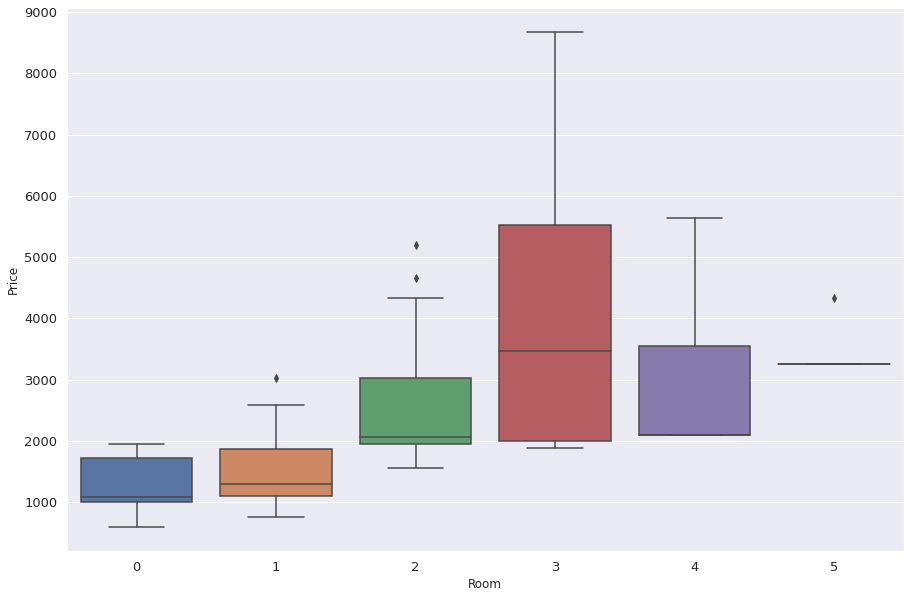

In [43]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x='Room', y='Price', data = london)
ax.tick_params(labelsize=13)
plt.show()